In [1]:
import keras
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from PIL import Image
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense,  Dropout
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
size = 224
dataset = []
label = []

In [3]:
covid_train = os.listdir("../input/covidxray/train/COVID19/")

for i, image_name in tqdm(enumerate(covid_train)):
    image = cv2.imread("../input/covidxray/train/COVID19/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(0) 
    
    
covid_test = os.listdir("../input/covidxray/test/COVID19/") 

for i, image_name in tqdm(enumerate(covid_test)):
    image = cv2.imread("../input/covidxray/test/COVID19/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(0) 

1056it [00:54, 19.40it/s]
262it [00:16, 16.33it/s]


In [4]:
normal_train = os.listdir("../input/covidxray/train/NORMAL/")

for i, image_name in tqdm(enumerate(normal_train)):
    image = cv2.imread("../input/covidxray/train/NORMAL/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(1) 
    
    
normal_test = os.listdir("../input/covidxray/test/NORMAL/") 

for i, image_name in tqdm(enumerate(normal_test)):
    image = cv2.imread("../input/covidxray/test/NORMAL/" + image_name) 
    image = Image.fromarray(image,'RGB')
    image = image.resize((size,size)) 
    dataset.append(np.array(image)) 
    label.append(1) 

1266it [01:25, 14.76it/s]
262it [00:17, 14.90it/s]


In [5]:
dataset_bi = dataset
label_bi = label

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

**Stacked_model**

In [39]:
model1 = tf.keras.models.load_model("../input/model-weights/DenseNet201_1.h5")
features1 = model1.layers[-2].output
model2 = tf.keras.models.load_model("../input/model-weights/VGG19.h5")
features2 = model2.layers[-2].output
model3 = tf.keras.models.load_model("../input/model-weights/ResNet50.h5")
features3 = model3.layers[-2].output

for name, layer in enumerate(model2.layers):
    layer._name = 'layer_'+str(name)+'layer_'
for name, layer in enumerate(model3.layers):
    layer._name = 'layer_'+str(name)+'layer_'+'layer_' 
    
concatenated=tf.keras.layers.Concatenate()([features1,features2,features3])

x= tf.keras.layers.Flatten(name='f')(concatenated)

x= Dense(128,activation='relu',name='dn')(x)
x= BatchNormalization(name = 'bn_2')(x)
x= Dropout(0.5,name='d_2')(x)
preds = Dense(2, activation='softmax',name='dn_3')(x)
concat = Model(inputs= [model1.input,model2.input,model3.input] , outputs= preds )

for layer in concat.layers[:-5]:
    layer.trainable=False
    
for layer in concat.layers[-5:]:
    layer.trainable=True

optimizer = Adam()
early_stop = EarlyStopping(monitor='val_loss', patience= 5 , verbose=1, mode='min', restore_best_weights = True)  
concat.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


Epoch 1/20
18/18 [==============================] - 34s 1s/step - loss: 0.6616 - accuracy: 0.7326 - val_loss: 9.6533e-04 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 16s 907ms/step - loss: 0.0151 - accuracy: 0.9983 - val_loss: 2.9715e-04 - val_accuracy: 1.0000
Epoch 3/20
18/18 [==============================] - 16s 909ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 2.7922e-04 - val_accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 16s 908ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 3.1352e-04 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 16s 908ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 3.6398e-04 - val_accuracy: 1.0000
Epoch 6/20
18/18 [==============================] - 16s 909ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 4.0924e-04 - val_accuracy: 1.0000
Epoch 7/20
18/18 [==============================] - 16s 907ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 4.5360e-

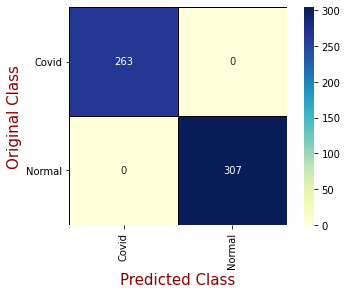

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       307

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

........CV Fold ends
Epoch 1/20
18/18 [==============================] - 16s 921ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 3.2181e-04 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 16s 913ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 3.6406e-04 - val_accuracy: 1.0000
Epoch 3/20
18/18 [==============================] - 16s 910ms/step - loss: 0.0034 - accuracy: 0.9996 - val_loss: 3.6133e-04 - val_accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 16s 908ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 3.8711e-04 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 16s 909ms/st

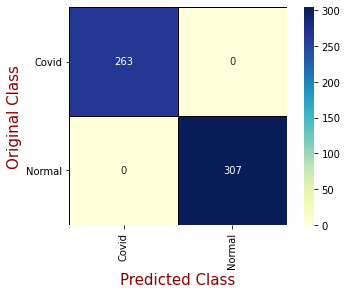

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       307

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

........CV Fold ends
Epoch 1/20
18/18 [==============================] - 16s 922ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.3248e-04 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 16s 911ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.3535e-04 - val_accuracy: 1.0000
Epoch 3/20
18/18 [==============================] - 16s 908ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 3.6593e-04 - val_accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 16s 911ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 4.0207e-04 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 16s 909ms/st

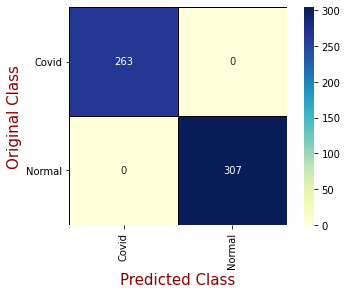

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       307

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

........CV Fold ends
Epoch 1/20
18/18 [==============================] - 16s 920ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 3.5949e-04 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 16s 908ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 3.8117e-04 - val_accuracy: 1.0000
Epoch 3/20
18/18 [==============================] - 16s 908ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 3.9606e-04 - val_accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 16s 910ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 3.8097e-04 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 16s 910ms/st

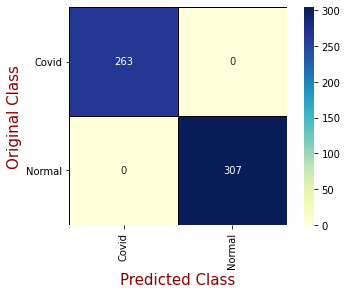

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       307

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

........CV Fold ends
Epoch 1/20
18/18 [==============================] - 16s 922ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 3.6672e-04 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 16s 908ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.4262e-04 - val_accuracy: 1.0000
Epoch 3/20
18/18 [==============================] - 16s 910ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.4194e-04 - val_accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 16s 909ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 3.8804e-04 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 16s 908ms/st

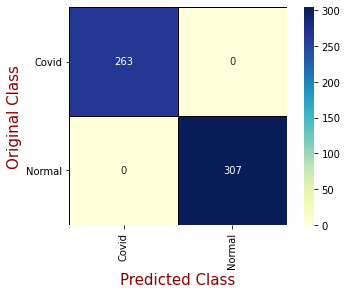

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       307

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570

........CV Fold ends
Estimated Accuracy 100.00


In [40]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

callbacks = [early_stop]

n_folds = 5
cv_scores = list()

for _ in range(n_folds):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20)
    # evaluate model
    history_concat = concat.fit([np.array(X_train2),np.array(X_train2),np.array(X_train2)],   
                         y_train2, 
                         batch_size = 128, 
                         verbose = 1, 
                         epochs = 20,      
                         validation_data=([np.array(X_test2),np.array(X_test2),np.array(X_test2)], y_test2),
                         shuffle = False,
                         callbacks=early_stop)

    print("Test_Accuracy: {:.2f}%".format(concat.evaluate((np.array(X_test2),np.array(X_test2),np.array(X_test2)), np.array(y_test2))[1]*100))
    
    cv_scores.append(val_acc)

    Y_pred_concat = concat.predict([np.array(X_test2),np.array(X_test2),np.array(X_test2)])
    y_pred_concat = np.argmax(Y_pred_concat, axis=1)
    y_classes = [np.argmax(y, axis=None, out=None) for y in y_test2]

    cnf_matrix = confusion_matrix(y_classes, y_pred_concat)
    cm = pd.DataFrame(cnf_matrix, columns = ['Covid', 'Normal'], 
                      index = ['Covid', 'Normal'])

    font = {'family': 'times new roman',
            'color':  'darkred',
            'weight': 'normal',
            'size': 15,
            }

    heat_map = sns.heatmap(cm, annot = True, square = True, linewidths= 0.5, linecolor= 'black',
                       cmap = 'YlGnBu', fmt = 'g', robust = True)

    heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 90)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation = 0)
    plt.xlabel('Predicted Class', fontdict= font)
    plt.ylabel('Original Class', fontdict= font)
    plt.show()

    print(classification_report(y_classes, y_pred_concat))
    print("........CV Fold ends")
    
print("================================================================================================================")    
print('Estimated Accuracy %.2f' % (np.max(cv_scores)))     

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_classes, y_pred_concat)

from sklearn.metrics import auc
auc_concat = auc(fpr, tpr)

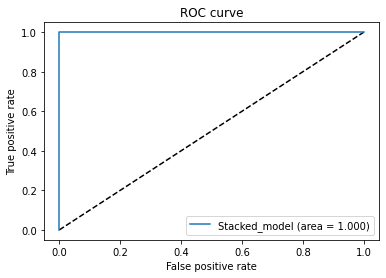

In [42]:
plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Stacked_model (area = {:.3f})'.format(auc_concat))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

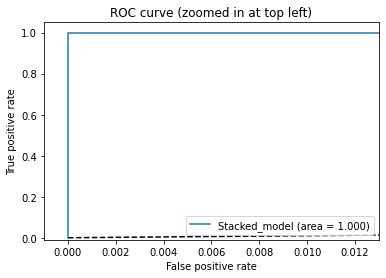

In [43]:
# Zoom in view of the upper left corner.
plt.figure(figsize=(6,4))
plt.xlim(-0.001, 0.013)
plt.ylim(-0.01, 1.05)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Stacked_model (area = {:.3f})'.format(auc_concat))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()